In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from datetime import timedelta, datetime
import json

In [2]:
logins= pd.read_json('data/logins.json')
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [3]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


# Exploratory Analysis

Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [4]:
logins['Count'] = 1
logins = logins.set_index('login_time').groupby(pd.Grouper(freq='15MIN')).count()
logins['month'] = logins.index.month
logins['weekday'] = logins.index.weekday_name
logins['day'] =logins.index.day
logins['hour'] = logins.index.hour
months = ['Janurary','February','March','April']

In [5]:
logins.head()

,Count,month,weekday,day,hour
login_time,,,,,
1970-01-01 20:00:00,2,1,Thursday,1,20
1970-01-01 20:15:00,6,1,Thursday,1,20
1970-01-01 20:30:00,9,1,Thursday,1,20
1970-01-01 20:45:00,7,1,Thursday,1,20
1970-01-01 21:00:00,1,1,Thursday,1,21


In [6]:
logins.describe()

,Count,month,day,hour
count,9788.000000,9788.000000,9788.000000,9788.000000
mean,9.515938,2.259093,14.569268,11.496935
std,8.328818,1.017219,8.683342,6.922294
min,0.000000,1.000000,1.000000,0.000000
25%,3.000000,1.000000,7.000000,5.000000
50%,7.000000,2.000000,14.000000,11.000000
75%,13.000000,3.000000,22.000000,17.000000
max,73.000000,4.000000,31.000000,23.000000


Average of roughly 10 logins per 15 minutes. The time ranges from Janurary 1970 - April 1970

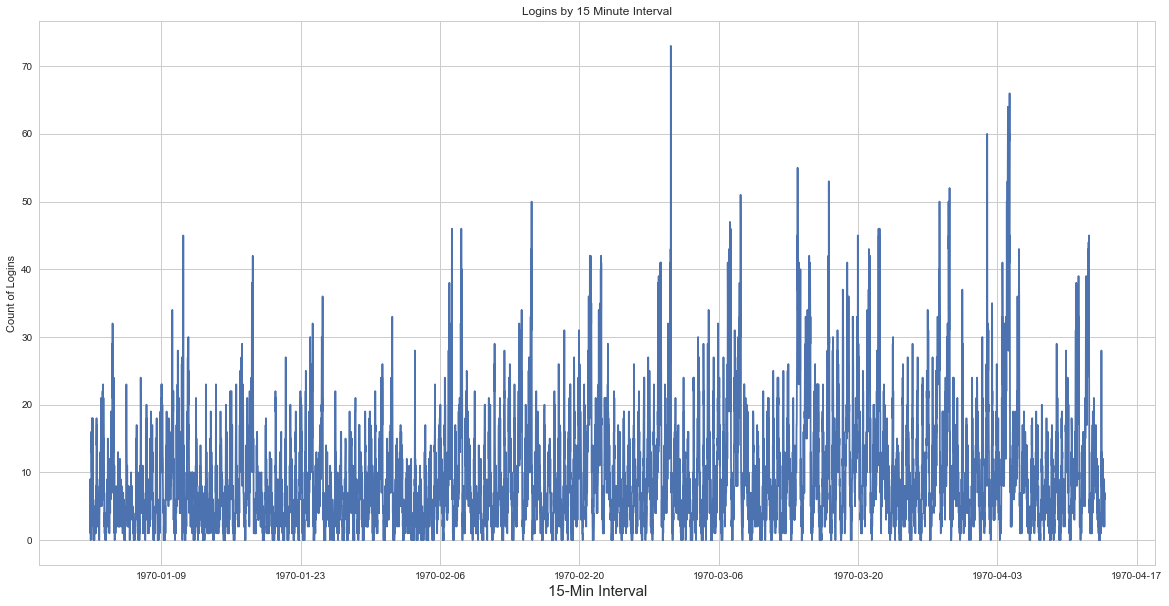

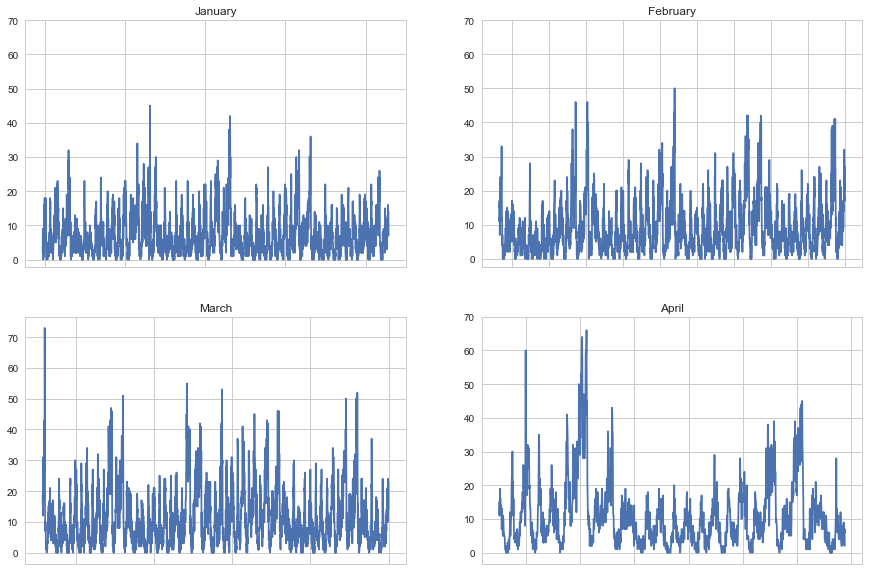

In [7]:
fig = plt.figure(figsize=(20,10))
fig = plt.plot(logins['Count'])
plt.title('Logins by 15 Minute Interval')
plt.xlabel('15-Min Interval', size=15)
plt.ylabel('Count of Logins')
months = {0:'January',1:'February',2:'March',3:'April'}
fig = plt.figure(figsize=(15,10))
for i in np.arange(4):
    ax = fig.add_subplot(2,2,i+1)
    plt.plot(logins[logins['month']==i+1]['Count'])
    ax.set_title(months[i])
    ax.set_xticklabels('')
    ax.set_yticks([0,10,20,30,40,50,60,70])

In [8]:
logins.groupby('month')['Count'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,2896.0,7.333909,6.099863,0.0,3.0,6.0,10.0,45.0
2,2688.0,9.178943,7.796656,0.0,3.0,7.0,13.0,50.0
3,2976.0,11.331653,9.335820,0.0,4.0,9.0,16.0,73.0
4,1228.0,10.999186,9.969840,0.0,4.0,8.0,15.0,66.0


Text(0,0.5,'Total Logins')

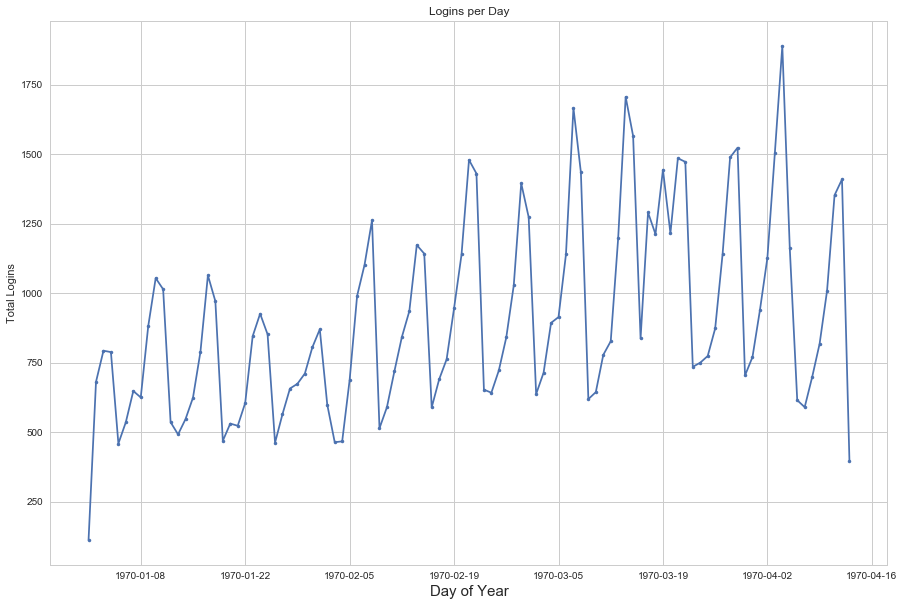

In [9]:
plt.figure(figsize=(15,10))
plt.plot(logins.resample('D').sum()['Count'], marker='.')
plt.title('Logins per Day' )
plt.xlabel('Day of Year', size=15)
plt.ylabel('Total Logins')

Text(0,0.5,'Count')

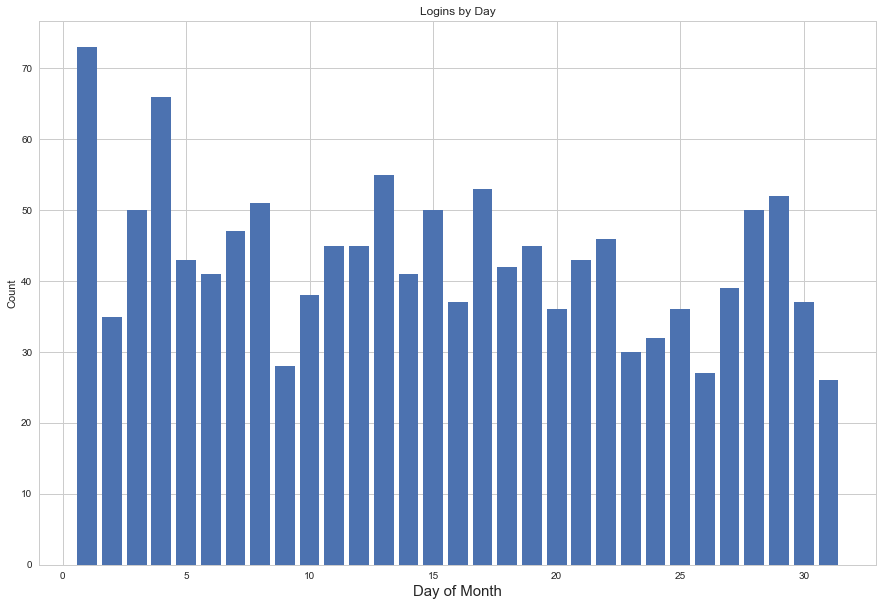

In [10]:
fig = plt.figure(figsize=(15,10))
fig = plt.bar(logins['day'], logins['Count'])
plt.title('Logins by Day')
plt.xlabel('Day of Month', size=15)
plt.ylabel('Count')

Text(0,0.5,'Hour of the Day')

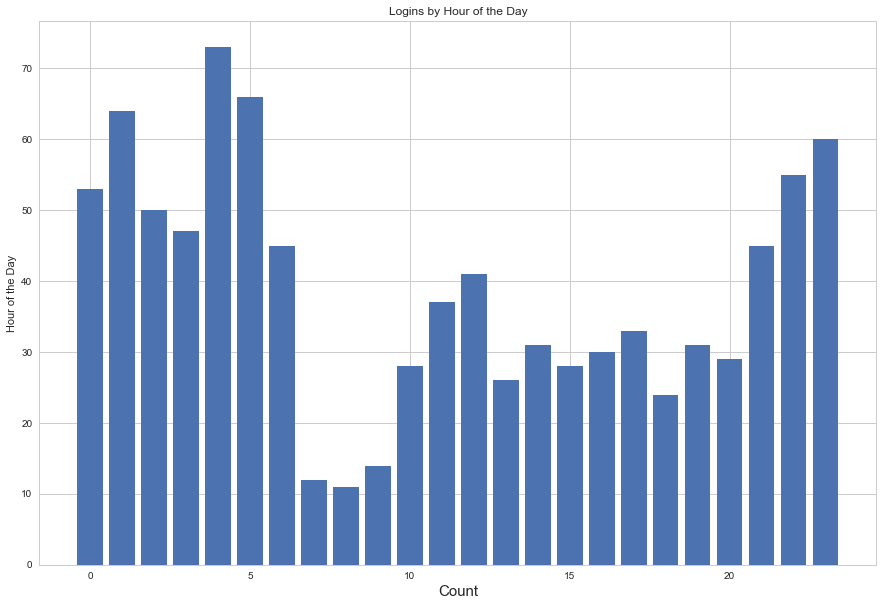

In [11]:
fig = plt.figure(figsize=(15,10))
fig = plt.bar(logins['hour'], logins['Count'])
plt.title('Logins by Hour of the Day')
plt.xlabel('Count', size=15)
plt.ylabel('Hour of the Day')

Text(0,0.5,'Count')

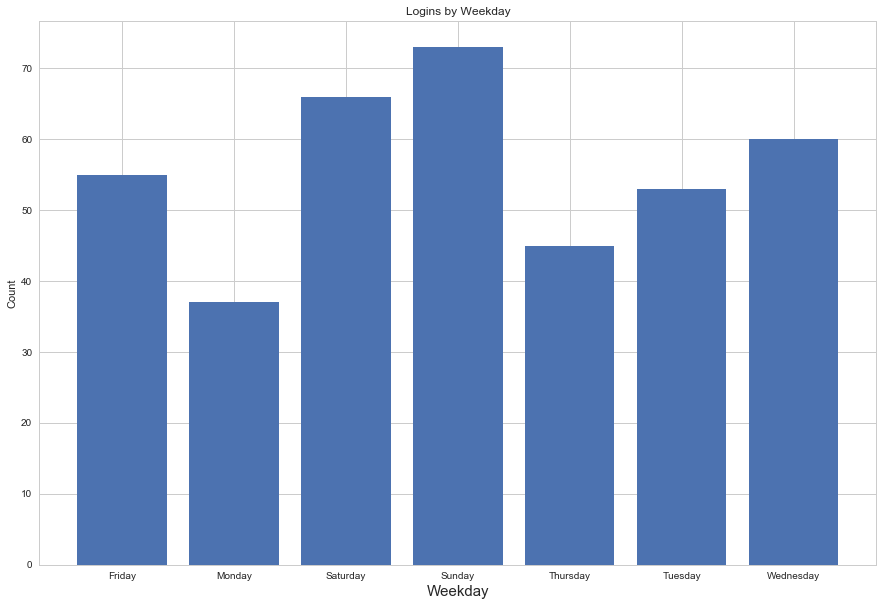

In [12]:
fig = plt.figure(figsize=(15,10))
fig = plt.bar(logins['weekday'], logins['Count'])
plt.title('Logins by Weekday')
plt.xlabel('Weekday', size=15)
plt.ylabel('Count')

**Analysis**:
1. There appears to be a growth in demand over time with March and April having similar login demands.
2. The beginning of each month tends to have a higher demand in logins then the end of the month.
3. Login demands tends to peak during late-night (9:00PM - 4:00AM) and pick up again around lunch time (10:00AM - Noon)
4. The login demands peak during the weekend



## Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    a. how you will implement the experiment
    b. what statistical test(s) you will conduct to verify the significance of the observation
    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
    
    
### Part 2: Answers

1.
   The neighboring cities' complementary circadian rhythms on weekdays creates an imbalance of demand in both customers and drivers between the cities. During the day Metropolis would have very high demand and Gotham would have very low demand, and at night vice-versa. Drivers may be unwilling to pay a toll to attempt to get rides in an area with low demand. Also drivers may line up their schedules with the complementary circadian rhythms as another way to avoid paying tolls. This is an important issue to address, because it may be possible that the drivers unwillingness to pay tolls would cause supply to be much lower than the demand in one city during its off-peak hours. This could result in customers becoming frustrated and the drivers / company losing out on revenue. The waiting time a customer experiences has a direct relationship with driver availability and customer satisfaction. The lower the availability of drivers, the longer a customer has to wait for the service, and thus the less satisfied the customer will be. If waiting times are too long, customers may decide to use another service and the company will miss out of potential revenue. 
   
   The main goal of this experiement should not be to create an even ratio of driver availability between cities, but rather to provide insights on whether eliminating toll costs for drivers have a significant relationship with reveneue. But an increase in revenue is not enough to measure success of the experiement, becuase the toll reimbursement must outweigh the revenue. Our **key metric** will be profits.
   
2.
   The experiment that I would design to comprare the effectiveness of the change would be to implement an A/B study by  creating two groups of drivers. One group will serve as a control and still pay the fare the other is the treatment group with the fare reimbursement. We randomly assign the drivers to one of two groups. Our null hypothesis is that there is no difference in the income between the groups. We then would use a t-test to assess the results of the A/B study and use a confidence of .05 to reject the null hypothesis.
   
   If the results showed that there was no significant difference and we did not reject the null hypothesis, I would recommend no longer persuing the reimbursement plan. If we found enough of a significant difference and rejected the null hypothesis I would open the reimbursement plan to all drivers and continue to watch the revenue to make sure that the company still remained profitable with reimbursing all drivers




# Part 3 ‑ Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­ term rider retention (again, a few sentences will suffice).

### Data description
- **city:** city this user signed up in 
- **phone:** primary device for this user 
- **signup_date:** date of account registration; in the form ‘YYYY MM DD’ 
- **last_trip_date:** the last time this user completed a trip; in the form ‘YYYY MM DD’ 
- **avg_dist:** the average distance in miles per trip taken in the first 30 days after signup 
- **avg_rating_by_driver:** the rider’s average rating over all of their trips 
- **avg_rating_of_driver:** the rider’s average rating of their drivers over all of their trips 
- **surge_pct:** the percent of trips taken with surge multiplier > 1 
- **avg_surge:** The average surge multiplier over all of this user’s trips 
- **trips_in_first_30_days:** the number of trips this user took in the first 30 days after signing up
- **ultimate_black_user:** TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
- **weekday_pct:** the percent of the user’s trips occurring during a weekday

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [14]:
with open('data/ultimate_data_challenge.json') as f:
    df = pd.DataFrame(json.loads(f.read()))
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [15]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [17]:
# Isolate the columns with missing values
df.isnull().sum()[df.isnull().sum() > 0]

avg_rating_by_driver     201
avg_rating_of_driver    8122
phone                    396
dtype: int64

Only 3 columns have missing values and two of those have a very small fraction that is missing. It will be easiest to impute the missing values for the numerical columns by the average value in each column and the categorical with a forward fill to try and keep a similar ratio that is already present.

In [18]:
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(value=df['avg_rating_by_driver'].mean())
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(value=df['avg_rating_of_driver'].mean())
df['phone'] = df['phone'].fillna(method='ffill')

Now we will work on figuring out the fraction of retained users (Active in past 30 days). Lets first convert the date/time columns to the proper data type and then create a new column that signifies if a user is active (retained)

In [19]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] =  pd.to_datetime(df['signup_date'])
df[['last_trip_date','signup_date']].describe()

,last_trip_date,signup_date
count,50000,50000
unique,182,31
top,2014-06-29 00:00:00,2014-01-18 00:00:00
freq,2036,2948
first,2014-01-01 00:00:00,2014-01-01 00:00:00
last,2014-07-01 00:00:00,2014-01-31 00:00:00


In [20]:
# Find the threshold for active users
active_threshold = df['last_trip_date'].max() - timedelta(days=30)

# Create new 0/1 column for active users
df['active'] = 0
df.loc[df['last_trip_date'] > active_threshold, 'active'] = 1

print('Active Users: %.0f' % sum(df['active']))
print('Percent Active: %.2f' % (sum(df['active'])/len(df)*100) +' %')
print('Fraction Active: %.0f' % (sum(df['active'])/len(df)*100)+'/100')

Active Users: 18310
Percent Active: 36.62 %
Fraction Active: 37/100


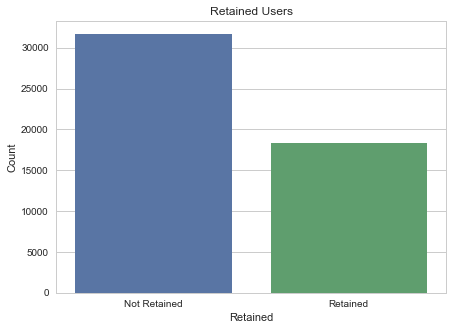

In [21]:
fig = plt.figure(figsize=(7,5))
fig = sns.countplot(x='active', data=df)
_ = plt.title('Retained Users')
_ = plt.xticks(np.arange(2),('Not Retained','Retained'))
_ = plt.xlabel('Retained')
_ = plt.ylabel('Count')

There are 18310 active users, which is around 37% of total users. Now we will build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system.

In [22]:
y = df['active']
X = df.drop(['active'], axis=1)

In [23]:
# Create dummy variables for the categorical data 
X = pd.get_dummies(X, columns = ['city', 'phone', 'ultimate_black_user'])
X.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,46.2,0,1,0,0,1,0,1
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,50.0,1,0,0,1,0,1,0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,100.0,1,0,0,0,1,1,0
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,80.0,0,1,0,0,1,0,1
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,82.4,0,0,1,1,0,1,0


In [24]:
# We need to transform signup date into a numerical value & drop last_trip_date since it defines an active user
X['Days Since Signed Up'] = X['signup_date'].apply(lambda x:(df['last_trip_date'].max() - x).days)

X = X.drop(['last_trip_date','signup_date','ultimate_black_user_False'], axis=1)

In [25]:
X.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_True,Days Since Signed Up
0,3.67,5.0,4.7,1.10,15.4,4,46.2,0,1,0,0,1,1,157
1,8.26,5.0,5.0,1.00,0.0,0,50.0,1,0,0,1,0,0,153
2,0.77,5.0,4.3,1.00,0.0,3,100.0,1,0,0,0,1,0,176
3,2.36,4.9,4.6,1.14,20.0,9,80.0,0,1,0,0,1,1,172
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0,0,1,1,0,0,155


In [26]:
# Splitting the dataset into the Training set and Test set#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [27]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression

Logistic regression is a good starting point.

In [29]:
log_reg = LogisticRegression(random_state=1)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

print("Score:", log_reg.score(X_test, y_test))
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

Score: 0.7204
Classification Report:
             precision    recall  f1-score   support

          0       0.74      0.86      0.79      9443
          1       0.67      0.49      0.56      5557

avg / total       0.71      0.72      0.71     15000



In [30]:
y_pred_prob = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

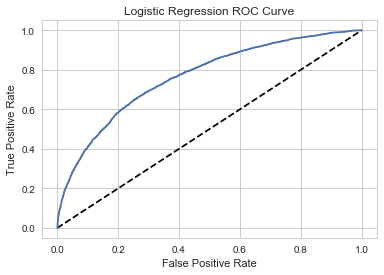

Area under curve: 0.76395151451


In [31]:
plt.plot([0,1], [0,1], "k--")
plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()
print("Area under curve:", roc_auc_score(y_test, y_pred_prob))

In [32]:
print(cross_val_score(log_reg, X, y, cv=5, scoring="roc_auc"),'\n',
      'Average Val Score',np.mean(cross_val_score(log_reg, X, y, cv=5, scoring="roc_auc")))

[ 0.77082439  0.76600853  0.76023884  0.76692008  0.7748779 ] 
 Average Val Score 0.767773948162


In [34]:
pd.DataFrame(index=X.columns, data=log_reg.coef_[0],
                       columns=['Coef']).sort_values(by='Coef', ascending=False)

,Coef
trips_in_first_30_days,0.456738
city_King's Landing,0.447933
ultimate_black_user_True,0.437254
phone_iPhone,0.265917
surge_pct,0.091618
Days Since Signed Up,0.050494
weekday_pct,0.044800
avg_rating_of_driver,-0.029081
avg_surge,-0.052976
avg_rating_by_driver,-0.066982


## Random Forest

#### Simple Model

In [35]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

print("Score:", rfc.score(X_test, y_test))
print("Classification Report:")
print(classification_report(y_test, y_pred_rfc))

Score: 0.7618
Classification Report:
             precision    recall  f1-score   support

          0       0.78      0.86      0.82      9443
          1       0.72      0.59      0.65      5557

avg / total       0.76      0.76      0.76     15000



#### Tuning Hyper-parameters

In [46]:
parameters = {'n_estimators': np.arange(10,150,10)}
rfc = RandomForestClassifier(random_state=1, n_jobs=-1)
rfc_gs = GridSearchCV(rfc, parameters)
rfc_gs.fit(X_train, y_train)

results_rfc_gs = pd.DataFrame(rfc_gs.cv_results_)
results_rfc_gs.sort_values('mean_test_score', ascending = False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
12,0.833069,0.175688,0.776800,0.999971,130,{'n_estimators': 130},1,0.780063,0.999957,0.774235,1.000000,0.776101,0.999957,0.001787,0.050829,0.002430,2.020291e-05
10,0.725884,0.106847,0.776771,0.999914,110,{'n_estimators': 110},2,0.780321,0.999957,0.772778,0.999914,0.777216,0.999871,0.005326,0.002339,0.003095,3.499096e-05
8,0.593915,0.109244,0.776714,0.999914,90,{'n_estimators': 90},3,0.780663,0.999957,0.771749,0.999914,0.777730,0.999871,0.002189,0.000463,0.003709,3.499096e-05
9,0.719316,0.107162,0.776686,0.999914,100,{'n_estimators': 100},4,0.780492,0.999957,0.772521,0.999957,0.777044,0.999829,0.007663,0.002668,0.003264,6.060656e-05
11,0.796544,0.141974,0.776429,0.999943,120,{'n_estimators': 120},5,0.779635,0.999957,0.773549,0.999957,0.776101,0.999914,0.052844,0.050867,0.002495,2.020161e-05
7,0.522611,0.105847,0.776171,0.999886,80,{'n_estimators': 80},6,0.779721,0.999914,0.771064,0.999871,0.777730,0.999871,0.048880,0.002585,0.003702,2.020204e-05
13,0.917446,0.177565,0.775971,0.999971,140,{'n_estimators': 140},7,0.778263,0.999957,0.773292,1.000000,0.776359,0.999957,0.052804,0.051862,0.002048,2.020291e-05
6,0.478045,0.107290,0.775800,0.999786,70,{'n_estimators': 70},8,0.778349,0.999786,0.771578,0.999786,0.777473,0.999786,0.004756,0.000692,0.003007,4.329163e-09
4,0.363285,0.106073,0.775457,0.999371,50,{'n_estimators': 50},9,0.778778,0.999357,0.771064,0.999486,0.776530,0.999271,0.008551,0.001795,0.003239,8.805250e-05
5,0.471305,0.111929,0.775143,0.999671,60,{'n_estimators': 60},10,0.777578,0.999614,0.771492,0.999743,0.776359,0.999657,0.004566,0.000898,0.002629,5.345170e-05


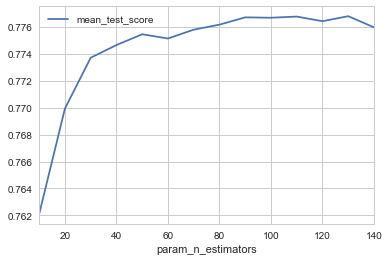

In [47]:
results_rfc_gs.plot('param_n_estimators','mean_test_score')

In [49]:
parameters = {'max_features':['sqrt',.1,.3,.5,.7,.99]}

rfc = RandomForestClassifier(n_estimators= 50, random_state=1, n_jobs=-1)
rfc_gs = GridSearchCV(rfc, parameters, n_jobs=-1)
rfc_gs.fit(X_train, y_train)

results_rfc_gs = pd.DataFrame(rfc_gs.cv_results_)
results_rfc_gs.sort_values('mean_test_score', ascending = False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_features,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
2,0.856696,1.880306,0.775714,0.999429,0.3,{'max_features': 0.3},1,0.776121,0.999400,0.773206,0.999571,0.777816,0.999314,0.266567,1.254826,0.001904,0.000107
1,0.369003,0.106716,0.775543,0.999529,0.1,{'max_features': 0.1},2,0.777492,0.999486,0.772178,0.999657,0.776959,0.999443,0.011388,0.001409,0.002389,0.000093
0,0.364358,0.105727,0.775457,0.999371,sqrt,{'max_features': 'sqrt'},3,0.778778,0.999357,0.771064,0.999486,0.776530,0.999271,0.000940,0.000825,0.003239,0.000088
3,3.540528,0.299533,0.773857,0.999429,0.5,{'max_features': 0.5},4,0.774835,0.999571,0.770464,0.999314,0.776273,0.999400,0.021172,0.010628,0.002470,0.000107
4,3.789530,0.307513,0.772857,0.999457,0.7,{'max_features': 0.7},5,0.778521,0.999357,0.769435,0.999571,0.770615,0.999443,0.097114,0.075095,0.004034,0.000088
5,2.488676,0.121009,0.770086,0.999543,0.99,{'max_features': 0.99},6,0.772949,0.999529,0.766950,0.999529,0.770358,0.999571,0.055711,0.011528,0.002457,0.000020


#### Tuned Model

In [54]:
rfc = RandomForestClassifier(n_estimators=50, max_features=.3,random_state=1)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

rfc_score = rfc.score(X_test, y_test)
print("Score:", rfc_score)
print("Classification Report:")
print(classification_report(y_test, y_pred_rfc))

Score: 0.7738
Classification Report:
             precision    recall  f1-score   support

          0       0.80      0.85      0.83      9443
          1       0.72      0.64      0.68      5557

avg / total       0.77      0.77      0.77     15000



#### Feature Importances

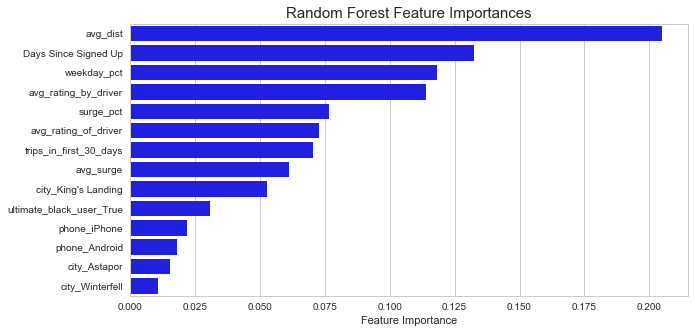

In [55]:
# Ordering columns by feature importance
rfc_fi = pd.DataFrame(index=X.columns, data=rfc.feature_importances_,
                       columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)

fig = plt.figure(figsize=(10,5))
fig = sns.barplot(y=rfc_fi.index, x=rfc_fi['Feature Importance'],color="blue")
_ = plt.title('Random Forest Feature Importances', size=15)

## eXtreme Gradient Boosting

#### Simple Model

In [37]:
xgbc = XGBClassifier(random_state=1)
xgbc.fit(X_train, y_train)
y_pred_xgbc = xgbc.predict(X_test)
print("Score:", xgbc.score(X_test, y_test))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgbc))

Score: 0.7888
Classification Report:
             precision    recall  f1-score   support

          0       0.81      0.86      0.84      9443
          1       0.74      0.66      0.70      5557

avg / total       0.79      0.79      0.79     15000



#### Tuning Hyper-paramters

In [52]:
parameters = {'n_estimators': np.arange(10,150,10)}

xgbc_gs = XGBClassifier(random_state=1)
xgbc_gs = GridSearchCV(xgbc_gs, parameters, n_jobs=-1)
xgbc_gs.fit(X_train, y_train)
        
results_xgbc_gs = pd.DataFrame(xgbc_gs.cv_results_)
results_xgbc_gs.sort_values('mean_test_score', ascending = False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
13,1.872326,0.054854,0.791857,0.799629,140,{'n_estimators': 140},1,0.794292,0.799469,0.787949,0.801354,0.793331,0.798063,0.104463,2.973602e-07,0.002791,0.001348
12,2.223053,0.060173,0.791486,0.798900,130,{'n_estimators': 130},2,0.794377,0.798869,0.787692,0.800797,0.792388,0.797034,0.025737,5.235343e-03,0.002803,0.001536
11,2.018268,0.070147,0.791229,0.798414,120,{'n_estimators': 120},3,0.793692,0.798569,0.787777,0.800411,0.792217,0.796263,0.015241,3.289646e-03,0.002514,0.001697
10,1.881633,0.062499,0.791029,0.797086,110,{'n_estimators': 110},4,0.793692,0.797583,0.787006,0.798954,0.792388,0.794720,0.053276,2.049086e-03,0.002894,0.001764
9,1.680837,0.056515,0.790514,0.796529,100,{'n_estimators': 100},5,0.792577,0.796983,0.787178,0.797754,0.791788,0.794849,0.022892,3.759780e-03,0.002381,0.001229
8,1.468404,0.049535,0.790171,0.795329,90,{'n_estimators': 90},6,0.791806,0.795354,0.787178,0.796640,0.791531,0.793992,0.014298,4.694607e-04,0.002120,0.001081
7,1.313153,0.045213,0.789771,0.793743,80,{'n_estimators': 80},7,0.791720,0.794240,0.785978,0.794497,0.791617,0.792492,0.005236,1.243709e-03,0.002683,0.000891
6,1.168207,0.040558,0.789029,0.793414,70,{'n_estimators': 70},8,0.791720,0.793597,0.785292,0.794240,0.790074,0.792406,0.014574,2.350783e-03,0.002726,0.000760
5,0.995670,0.033909,0.787543,0.791886,60,{'n_estimators': 60},9,0.790692,0.791454,0.783749,0.792868,0.788188,0.791335,0.000941,1.083865e-06,0.002871,0.000697
4,0.876987,0.028258,0.785943,0.789400,50,{'n_estimators': 50},10,0.789063,0.788668,0.782892,0.791497,0.785873,0.788035,0.004976,4.701340e-04,0.002520,0.001505


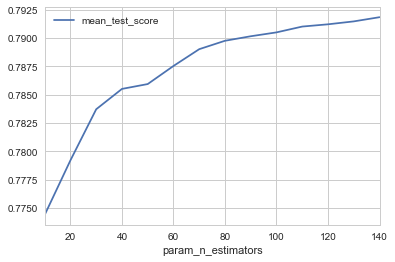

In [53]:
results_xgbc_gs.plot('param_n_estimators','mean_test_score')

In [56]:
parameters = {'learning_rate': [.001,.01,.1,1,10,100]}

xgbc_gs = XGBClassifier(n_estimators=80, random_state=1)
xgbc_gs = GridSearchCV(xgbc_gs, parameters, n_jobs=-1)
xgbc_gs.fit(X_train, y_train)
        
results_xgbc_gs = pd.DataFrame(xgbc_gs.cv_results_)
results_xgbc_gs.sort_values('mean_test_score', ascending = False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_learning_rate,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
2,1.208093,0.036911,0.789771,0.793743,0.1,{'learning_rate': 0.1},1,0.791720,0.794240,0.785978,0.794497,0.791617,0.792492,0.276789,6.354097e-03,0.002683,0.000891
3,1.353048,0.039893,0.786771,0.819300,1,{'learning_rate': 1},2,0.791035,0.819740,0.785549,0.817126,0.783730,0.821034,0.064661,4.308666e-03,0.003105,0.001625
1,0.798863,0.019615,0.770829,0.772500,0.01,{'learning_rate': 0.01},3,0.775949,0.771268,0.761893,0.773754,0.774644,0.772478,0.035271,4.704150e-04,0.006341,0.001015
0,0.779587,0.017614,0.746000,0.746643,0.001,{'learning_rate': 0.001},4,0.747836,0.744353,0.740550,0.750054,0.749614,0.745522,0.018881,4.756422e-04,0.003921,0.002458
5,0.659901,0.011969,0.746000,0.746643,100,{'learning_rate': 100},4,0.747836,0.744353,0.740550,0.750054,0.749614,0.745522,0.069405,2.973602e-07,0.003921,0.002458
4,0.593745,0.013303,0.268886,0.268886,10,{'learning_rate': 10},6,0.264935,0.270861,0.276678,0.264989,0.265044,0.270807,0.007697,2.054515e-03,0.005510,0.002755


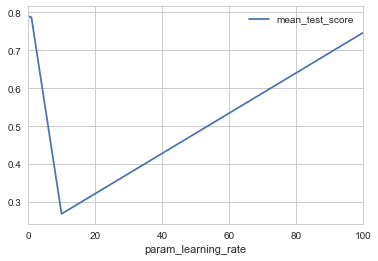

In [58]:
results_xgbc_gs.plot('param_learning_rate','mean_test_score')

In [64]:
xgbc = XGBClassifier(n_estimators=80, learning_rate=.1,random_state=1)
xgbc.fit(X_train, y_train)
y_pred_xgbc = xgbc.predict(X_test)

xgbc_score = xgbc.score(X_test, y_test)
print("Score:",xgbc_score)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgbc))

Score: 0.787533333333
Classification Report:
             precision    recall  f1-score   support

          0       0.81      0.86      0.84      9443
          1       0.74      0.66      0.70      5557

avg / total       0.78      0.79      0.78     15000



#### Feature Importances

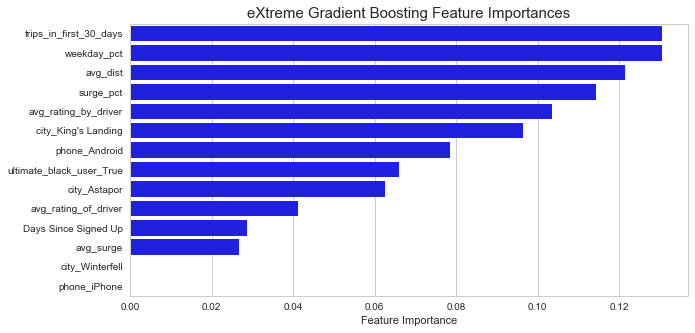

In [65]:
# Ordering columns by feature importance
xgbc_fi = pd.DataFrame(index=X.columns, data=xgbc.feature_importances_,
                       columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)

fig = plt.figure(figsize=(10,5))
fig = sns.barplot(y=xgbc_fi.index, x=xgbc_fi['Feature Importance'],color="blue")
_ = plt.title('eXtreme Gradient Boosting Feature Importances', size=15)

# Results

In [61]:
print('\n','Logistic Regression Score:',log_reg.score(X_test, y_test),'\n',
      'Random Forest Score:',rfc.score(X_test, y_test),'\n',
      'eXtreme Gradient Boosting Score:',xgbc.score(X_test, y_test))


 Logistic Regression Score: 0.7204 
 Random Forest Score: 0.7738 
 eXtreme Gradient Boosting Score: 0.783266666667


In [72]:
pd.DataFrame(index=X.columns, data=log_reg.coef_[0],
                       columns=['Coef']).sort_values(by='Coef', ascending=False)

,Coef
trips_in_first_30_days,0.456738
city_King's Landing,0.447933
ultimate_black_user_True,0.437254
phone_iPhone,0.265917
surge_pct,0.091618
Days Since Signed Up,0.050494
weekday_pct,0.044800
avg_rating_of_driver,-0.029081
avg_surge,-0.052976
avg_rating_by_driver,-0.066982


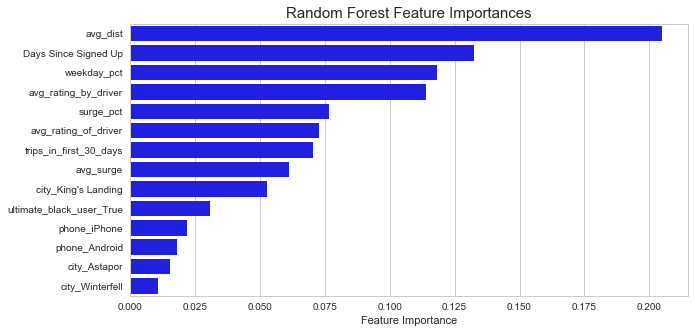

In [79]:
# Ordering columns by feature importance
rfc_fi = pd.DataFrame(index=X.columns, data=rfc.feature_importances_,
                       columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)

fig = plt.figure(figsize=(10,5))
fig = sns.barplot(y=rfc_fi.index, x=rfc_fi['Feature Importance'],color="blue")
_ = plt.title('Random Forest Feature Importances', size=15)

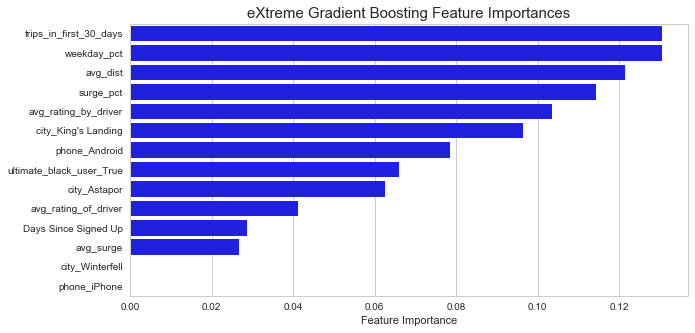

In [73]:
# Ordering columns by feature importance
xgbc_fi = pd.DataFrame(index=X.columns, data=xgbc.feature_importances_,
                       columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)

fig = plt.figure(figsize=(10,5))
fig = sns.barplot(y=xgbc_fi.index, x=xgbc_fi['Feature Importance'],color="blue")
_ = plt.title('eXtreme Gradient Boosting Feature Importances', size=15)

In [81]:
df.groupby('active')['avg_dist'].mean()

active
0    6.188478
1    5.118977
Name: avg_dist, dtype: float64

In [88]:
df.groupby(['city'])['active'].mean()

city
Astapor           0.243256
King's Landing    0.622606
Winterfell        0.342004
Name: active, dtype: float64

In [89]:
df.groupby(['phone'])['active'].mean()

phone
Android    0.196951
iPhone     0.439783
Name: active, dtype: float64

The approach I took was to create a simple model and slowly advanced to more complex models that tend to result in higher accuracy for classification. I started with Logistic Regression, then Random Forest, and finished with eXtreme Gradient Boosting. While there we other models I could have chosen (k-NN, SVM, NaiveBayes, Neural Networks) I believe that the models used are sufficient enough to predict user retention. 

The logistic regression model was left untuned, while the more complex models were tuned. The final results showed that the eXtreme Gradient Boosting model scored the highest with 78.33% accuracy, while the Random Forest model was close behind with 77.38% accuracy. By simply randomly guessing, one should be able to reach ~50% accuracy (since there are only two class labels). A machine learning algorithm will need to obtain > 50% accuracy in order to demonstrate that it has in fact “learned” something (or found an underlying pattern in the data). Our models have learned something and the results are valid. 


My recommendation for Ultimate to leverage the insights gained from the model to improve its long-term rider retention include:

- Including discounts, incentives, or waive surge rates for a riders first 30 days to get riders them to use the service more often in the first 30 days. This was our best model's most important feature, so if they are able to get riders to use their service more often after they first sign up then they may be able to increase retention rates.
- Riders whose averge distance was higher, tend to have less retention. There could be a discount after a threshold distance to encourage riders who need to travel farther to still use the service
- Explore reason's why the city of King's Landing has such a high rentention rate compared to the other two cities.
- Explore reason's why Android users have a lower retention rate. The app may be very slow or have issues that should be addressed.